# Sentiment Analysis - Movie Reviews Corpus

In [ ]:
# Llibreries
# Libraries

import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import movie_reviews, stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Pre-processament / Pre-processing

In [ ]:
# Carregar les dades
# Load the data

nltk.download('movie_reviews')
nltk.download('stopwords')

# Carregar el corpus de Movie Reviews
# Load the Movie Reviews corpus
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Transformar a DataFrame
# Transform to DataFrame
df = pd.DataFrame(documents, columns=['review', 'sentiment'])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/claudia/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/claudia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


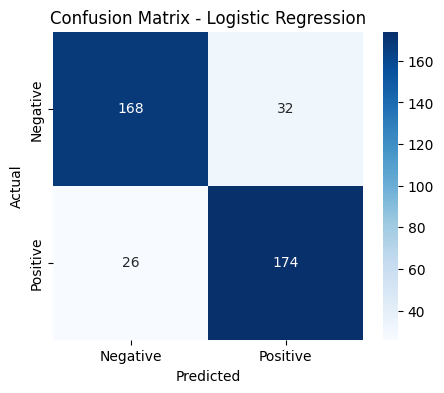

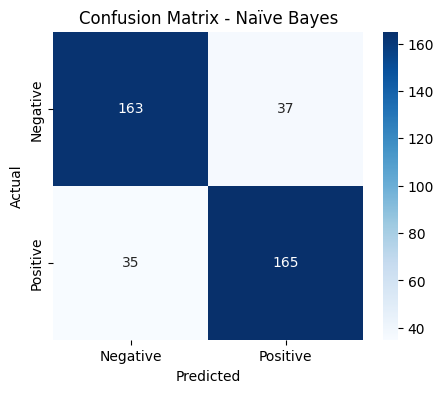

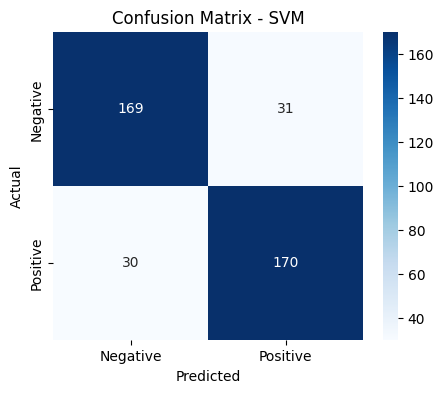

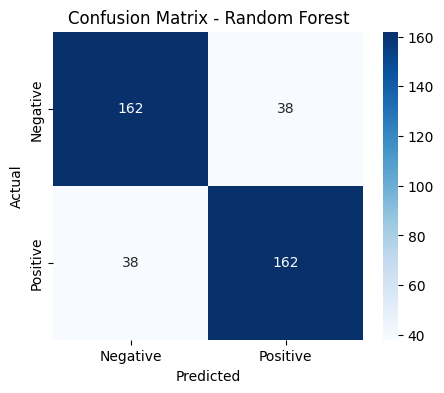

,Model,Accuracy
0,Logistic Regression,0.8550
1,Naïve Bayes,0.8200
2,SVM,0.8475
3,Random Forest,0.8100


In [1]:
# Preprocessament del text
# Text preprocessing

# Inicialitzar stopwords i puntuació
# Initialize stopwords and punctuation
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)  #??????

# Funció per preprocessar el text
# Function to preprocess the text
def preprocess_text(text):
    text = " ".join(text).lower()  # Unir palabras y convertir a minúsculas
    text = text.translate(translator)  # Eliminar puntuación
    text = " ".join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

# Aplicar preprocesament al text
# Apply text preprocessing
df['review'] = df['review'].apply(preprocess_text)

# Vectorizació amb CountVectorizer
# Vectorization with CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
y = np.array([1 if sentiment == 'pos' else 0 for sentiment in df['sentiment']])




In [ ]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelos supervisados
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entrenamiento y evaluación de modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Comparación de precisiones
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df